#Inspect Raw Netcdf

*******************************
Playing around with efficient ways to merge and view netcdf data from the tower. This ipython notebook depends on the python script of the same name.

In [8]:
usr = 'Julia'
FILEDIR = 'C:/Users/%s/Dropbox (PE)/KenyaLab/Data/Tower/TowerData/'%usr
NETCDFLOC = FILEDIR + 'raw_netcdf_output/'
DATALOC = 'F:/towerdata/'

###Using the xray dataset directly (only works for Table1)

In [9]:
import datetime as dt
from inspect_raw_netcdf import *
import matplotlib.pyplot as plt
%matplotlib inline

Which datafile do you want to look at (choose from list and use exact spelling)? 
lws, licor, WVIA, ts_data, flux, upper, Manifold, Table1, Table1Rain
Table1
If you don't want the full dataset, enter date range in format YYYY-MM-DD
start: 2012-01-13
end: 2012-01-15
Which of the following types of data would you like to explore?: 
VW,PA,Tsoil,shfTsoil


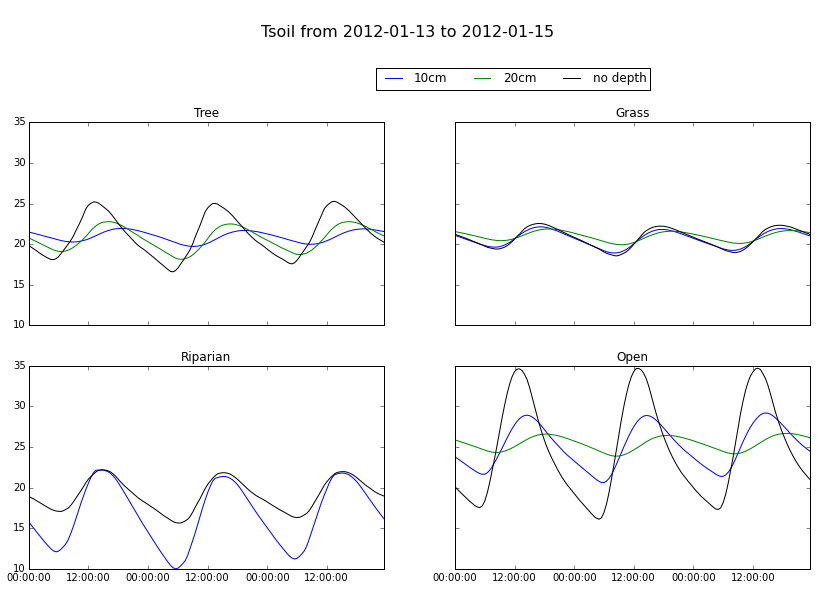

In [6]:
ds, start, end = process(NETCDFLOC)
L, places, ps, depths, colors, data_options = clean_Table1(ds)
data, data_list = pick_type(L, data_options)
fig = make_plots(FILEDIR,ds,start,end,places,ps,depths,colors,data,data_list)

In [14]:
print(dt.datetime.now())
start = '2015-01-01'
end = '2015-04-01'
ds = grabDateRange(NETCDFLOC,'upper',start=start,end=end)
print(dt.datetime.now())

2015-04-13 16:20:28.043000
2015-04-13 16:20:43.543000


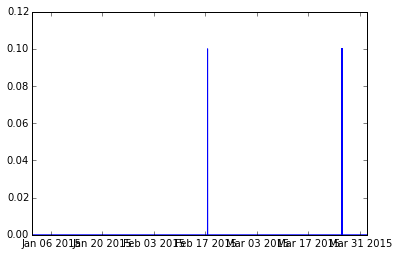

In [15]:
plt.plot(ds['time'],ds['rainfall_Tot'])

##Using iris to improve speed and unit comprehension

In [17]:
import iris

##Using a pandas dataframe with xray

In [4]:
from __future__ import print_function
import pandas as pd
import datetime as dt
import xray

In [5]:
def one_week(input_dir):
    datas = ['lws','licor','Table1','Table1_rain']
    #start = dt.datetime.utcnow()-dt.timedelta(7)
    start = dt.datetime(2014,01,1)
    end = dt.datetime(2014,01,10)
    for data in datas:
        try: 
            ds,df,params = inspect_raw(input_dir,data,start,end)
        except: 
            print('\nThere doesn\'t seem to be any %s data for this interval'%data)
    return ds,df,params

In [6]:
def inspect_raw(input_dir,data,start,end):
    ds = grabDateRange(input_dir,data,start,end)
    df = ds.to_dataframe().dropna(axis=1,how='all')
    non_null = set(df.columns)
    params = set(ds.vars)
    null_params = list(params - non_null)
    null_params.sort()
    print('\n%s data ranges from:\n'%data,
          ds.coords['time'].values[0], 'to\n',
          ds.coords['time'].values[-1], 
          '\n and contains null values for:' )
    for p in null_params:
        print('         ', p) 
    return ds,df,params

In [7]:
params

NameError: name 'params' is not defined

In [ ]:
ds,df,params = one_week(NETCDFLOC)

VW010cmGrass_v0_Avg
VW_Mes_v0_Avg_32_
VW005cmTree_v0_Avg
VW020cmRiparian_v0_Avg
VW100cmTree_v0_Avg
VW030cmTree_v0_Avg
VW100cmOpen_v0_Avg

C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.0659999996424, right=-0.0659999996424
  'left=%s, right=%s') % (left, right))
C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.268000006676, right=0.268000006676
  'left=%s, right=%s') % (left, right))



VW020cmTree_v0_Avg
VW010cmRiparian_v0_Avg
VW020cmOpen_v0_Avg
VW005cmOpen_v0_Avg
VW100cmRiparian_v0_Avg
VW030cmRiparian_v0_Avg
VW030cmOpen_v0_Avg
VW030cmGrass_v0_Avg
VW_Mes_v0_Avg_31_
VW005cmGrass_v0_Avg
VW010cmTree_v0_Avg
VW005cmRiparian_v0_Avg
VW100cmGrass_v0_Avg
VW020cmGrass_v0_Avg

C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0680000036955, right=0.0680000036955
  'left=%s, right=%s') % (left, right))
C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


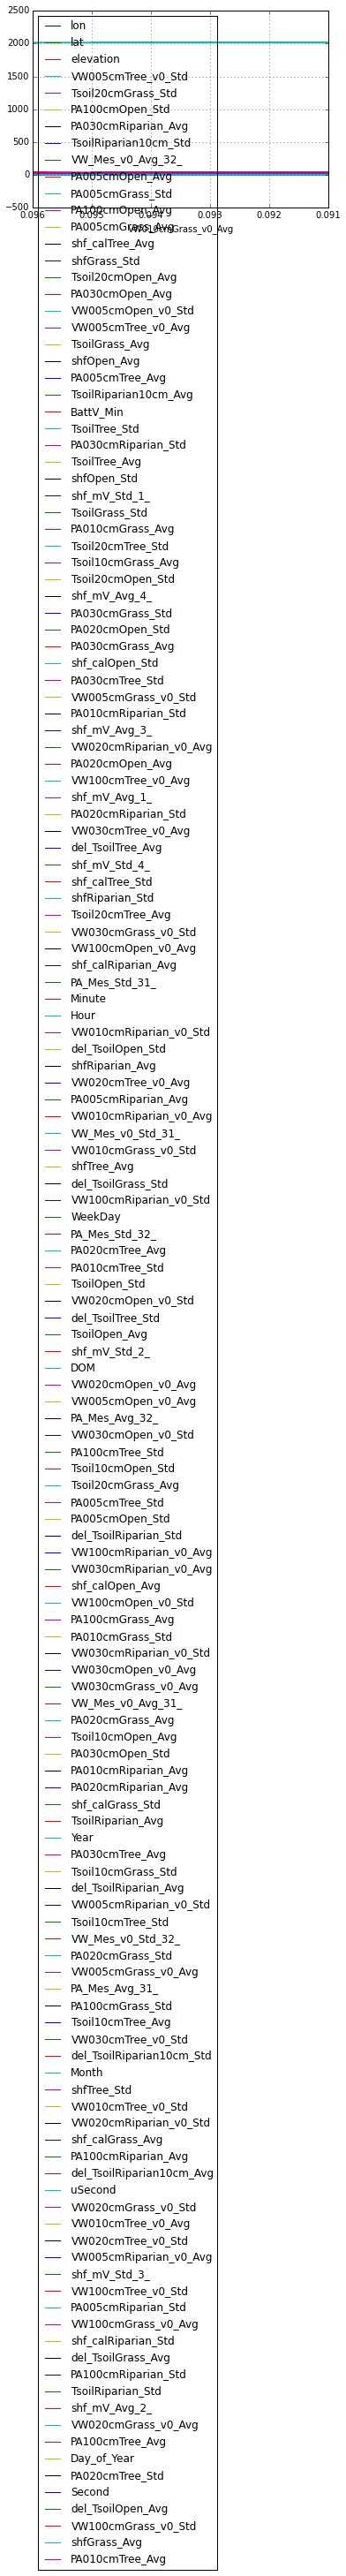

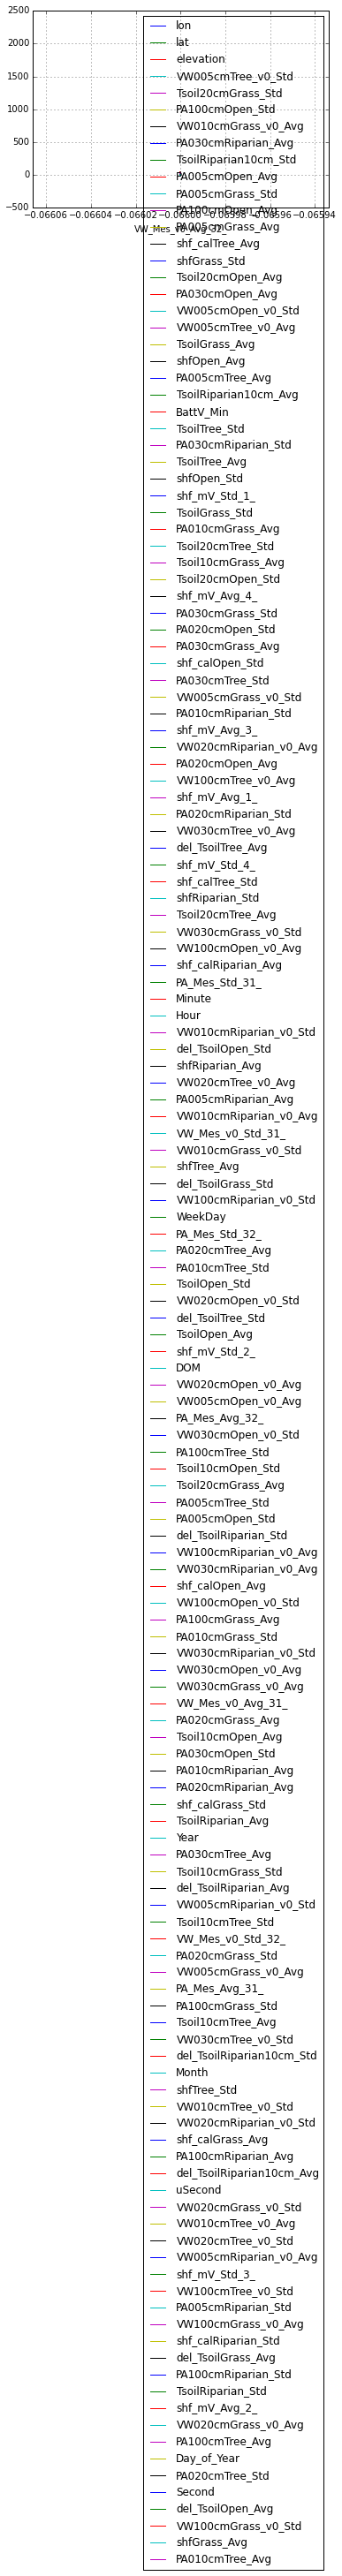

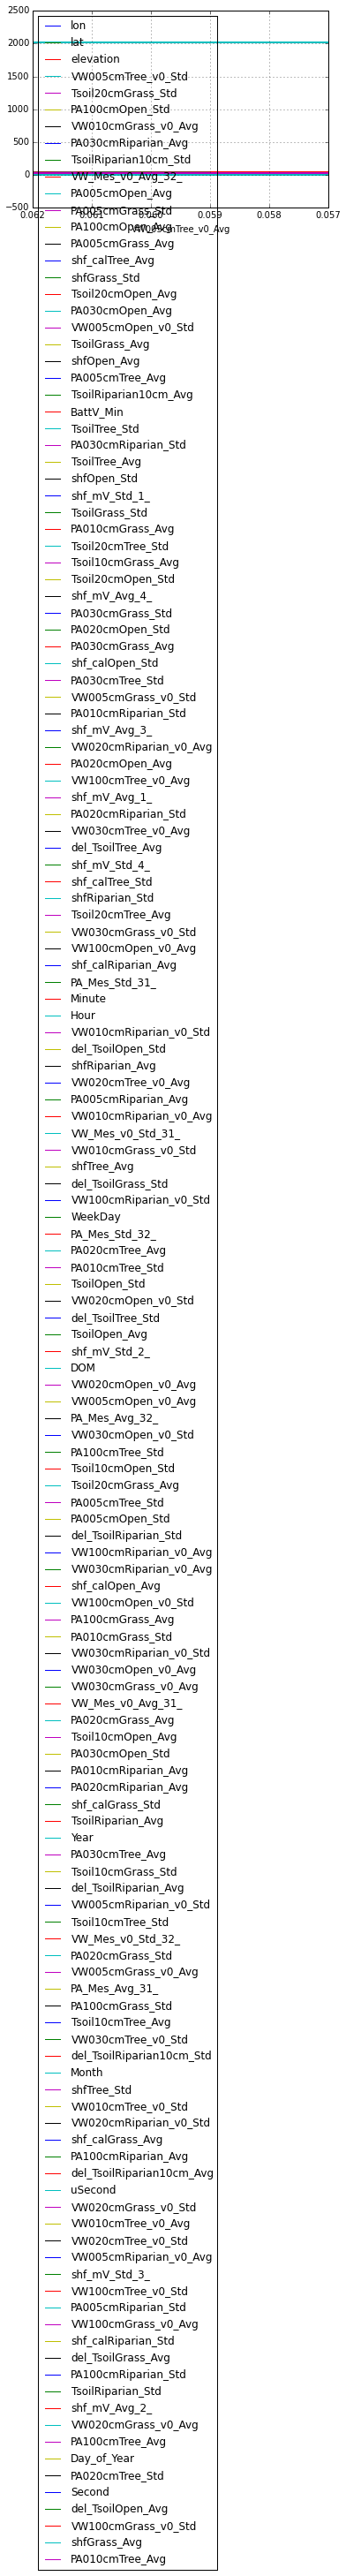

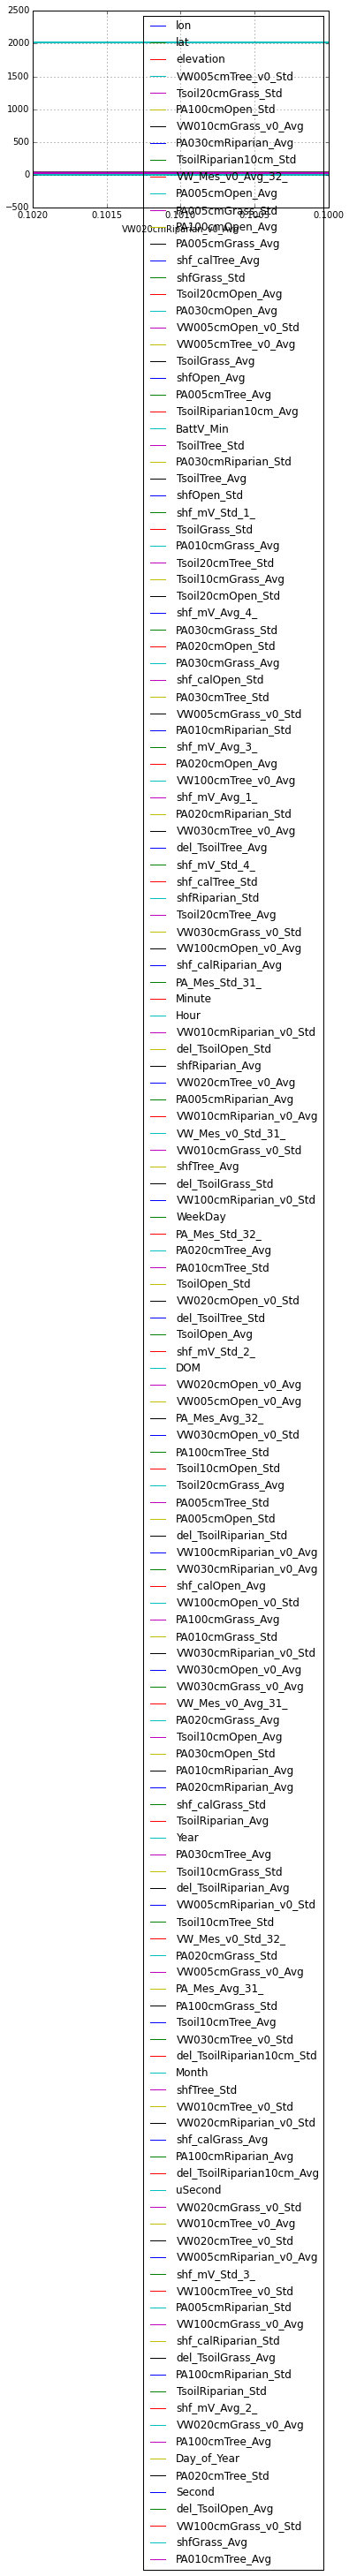

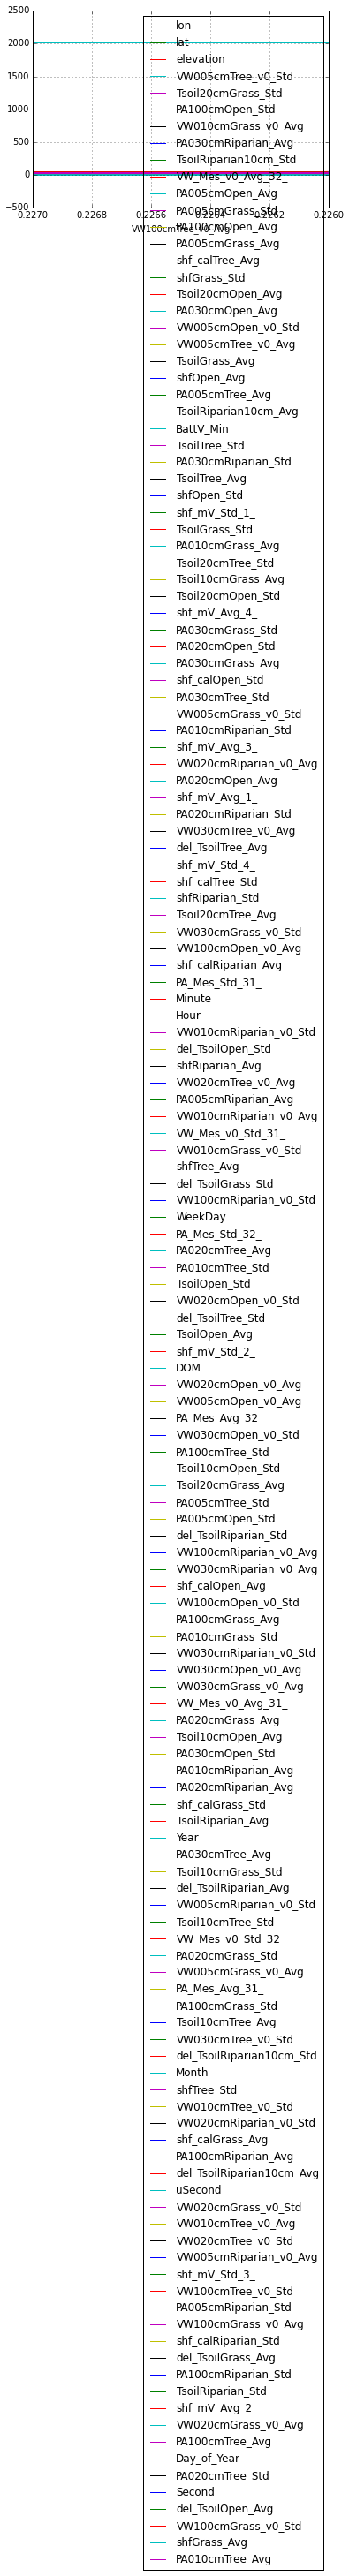

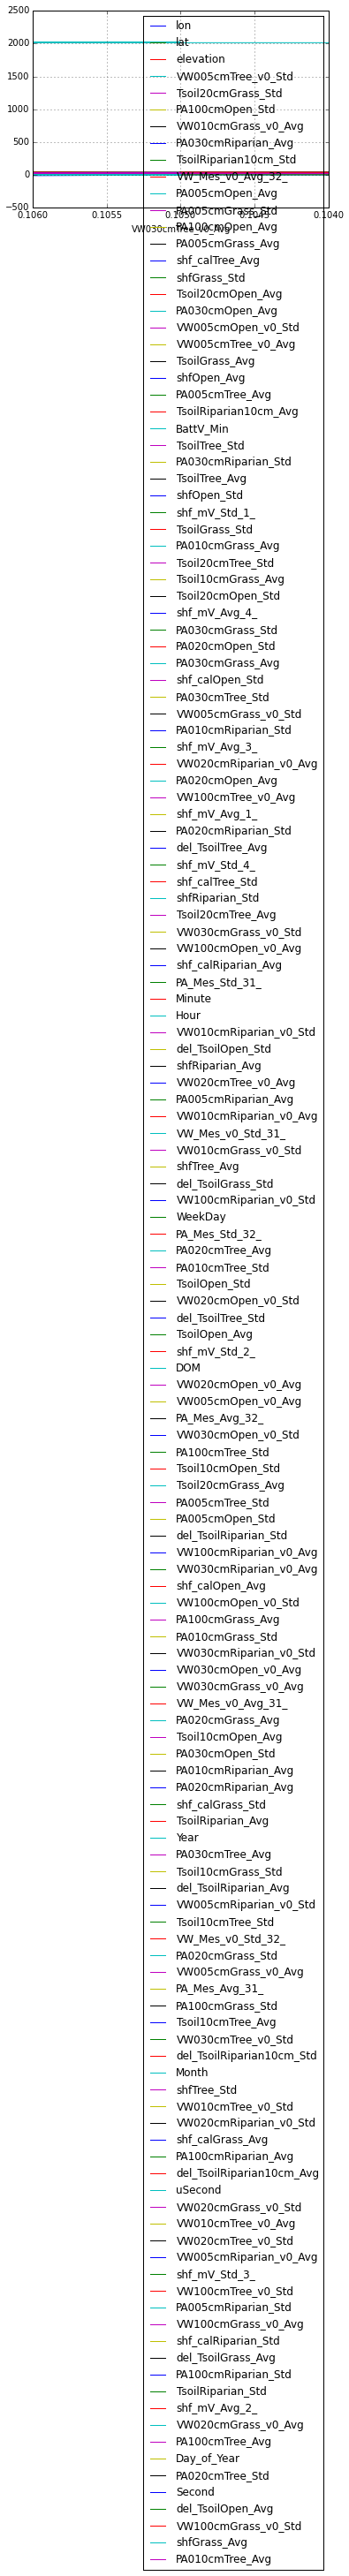

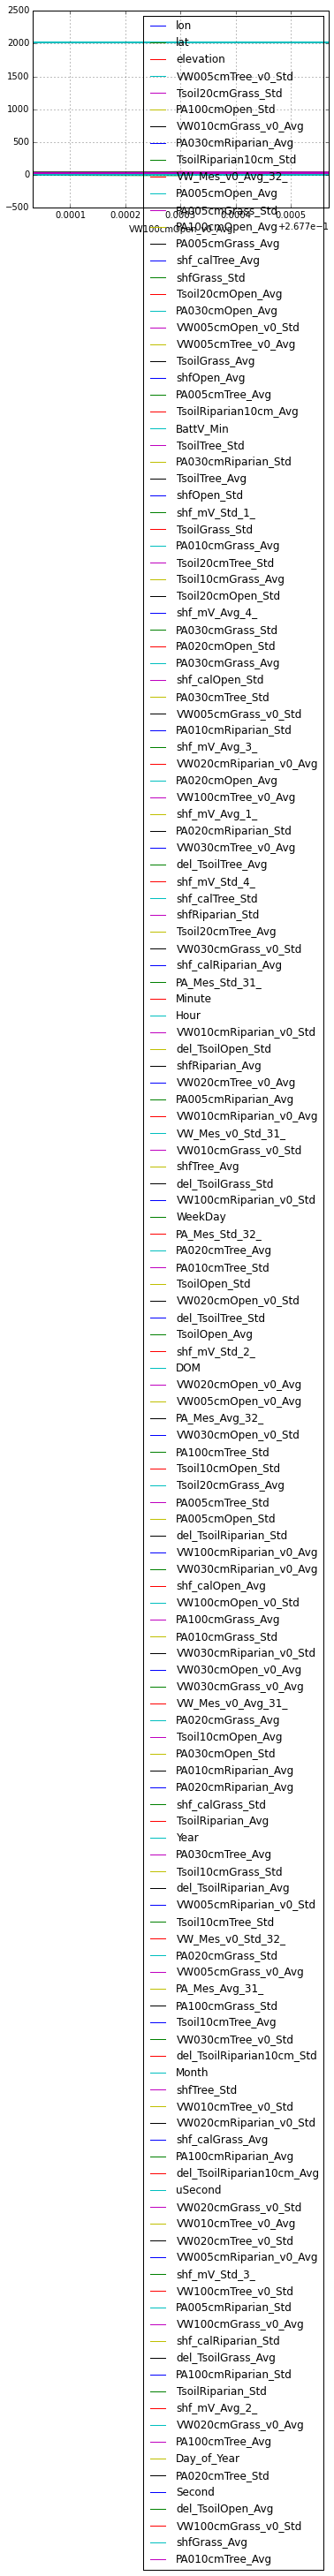

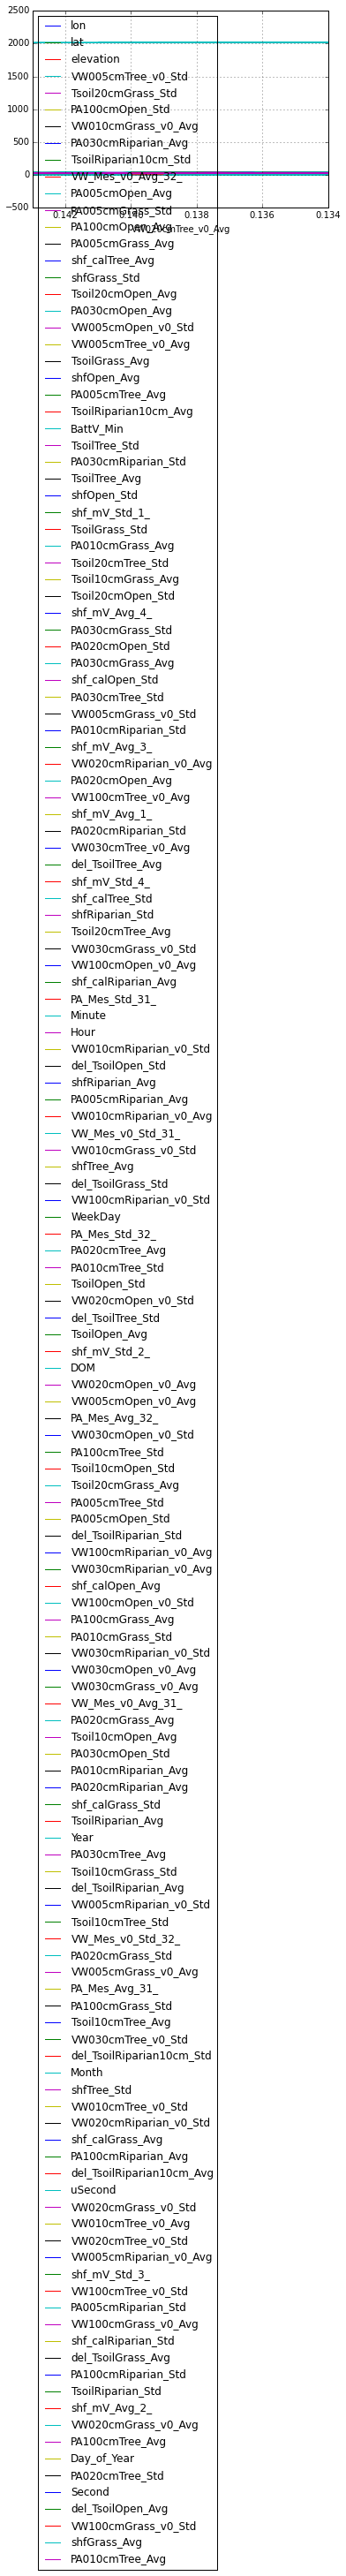

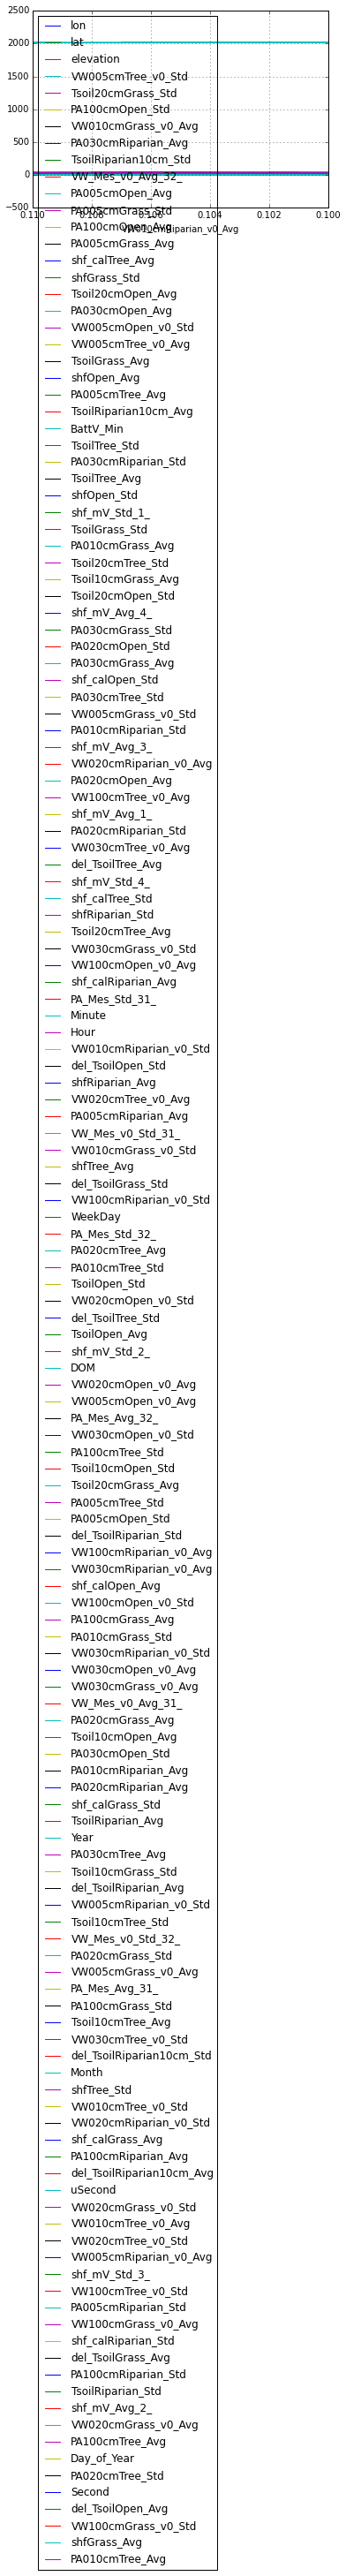

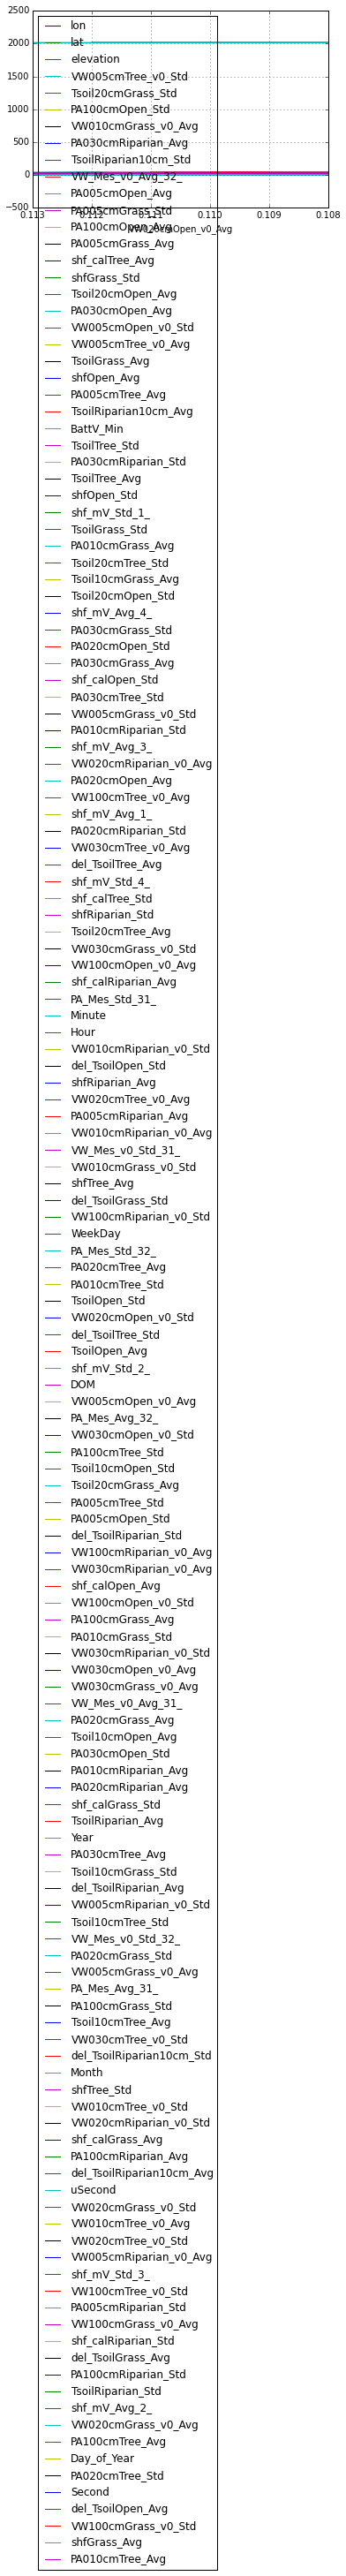

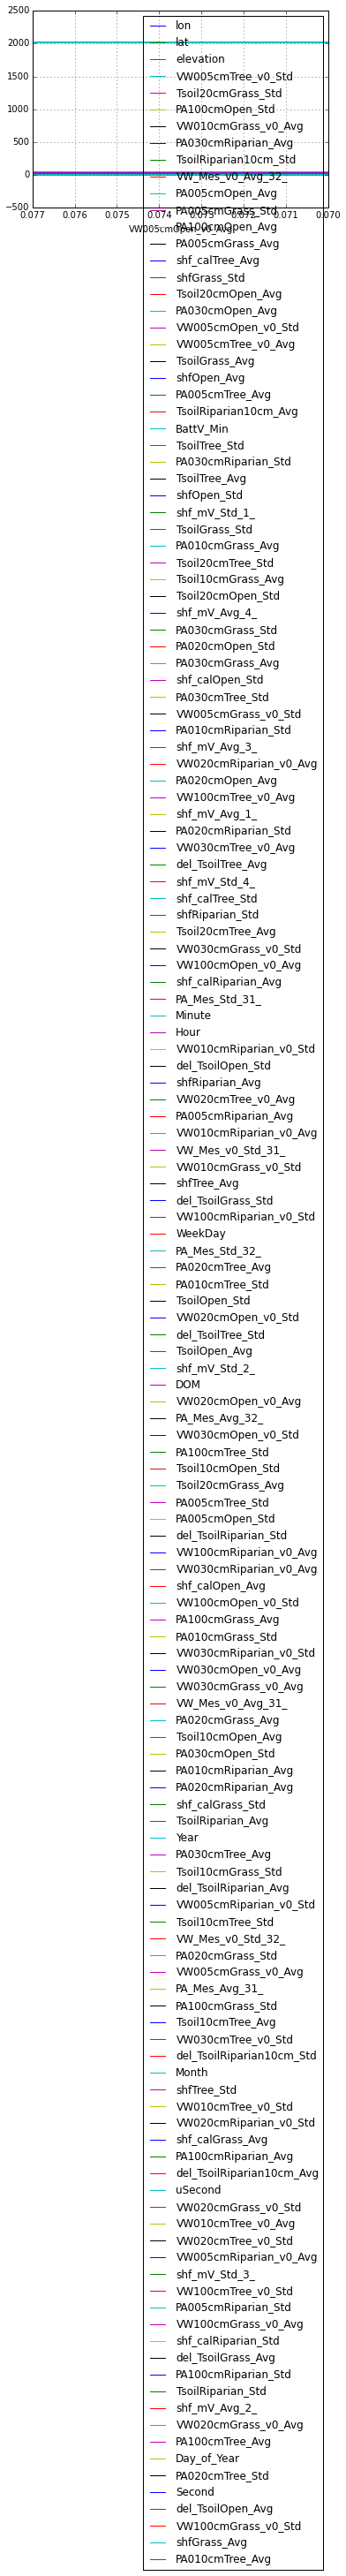

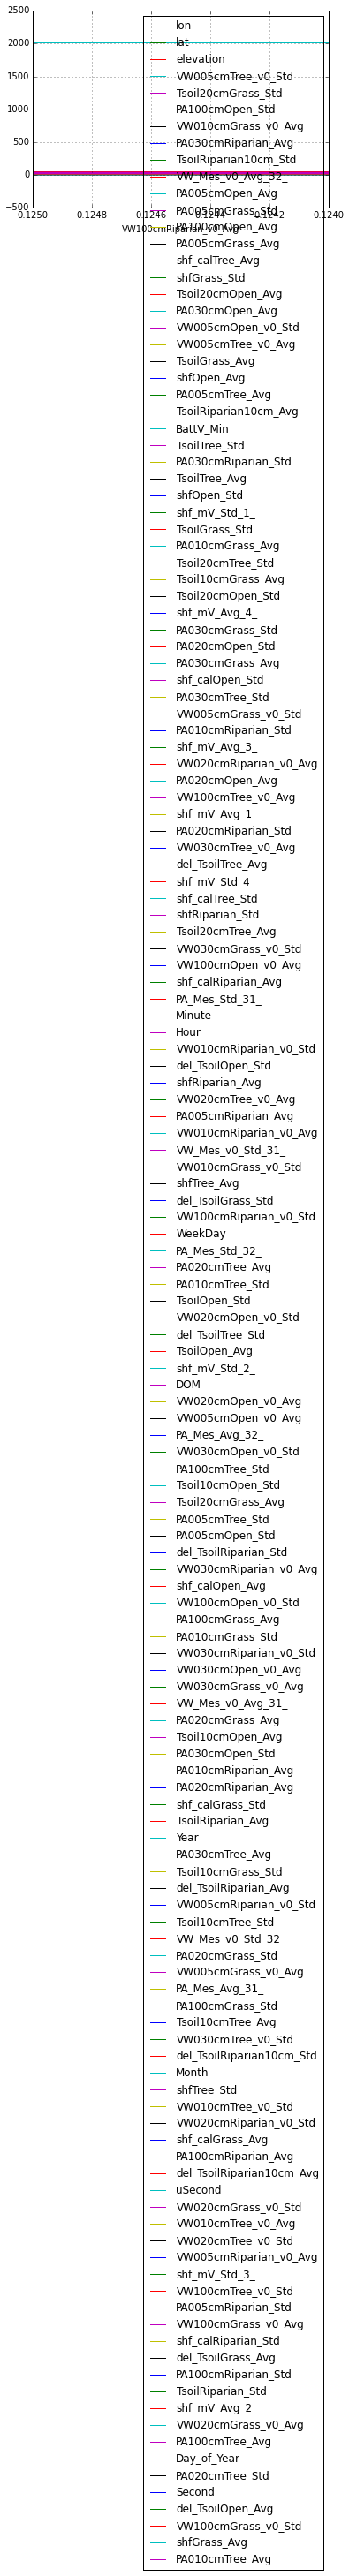

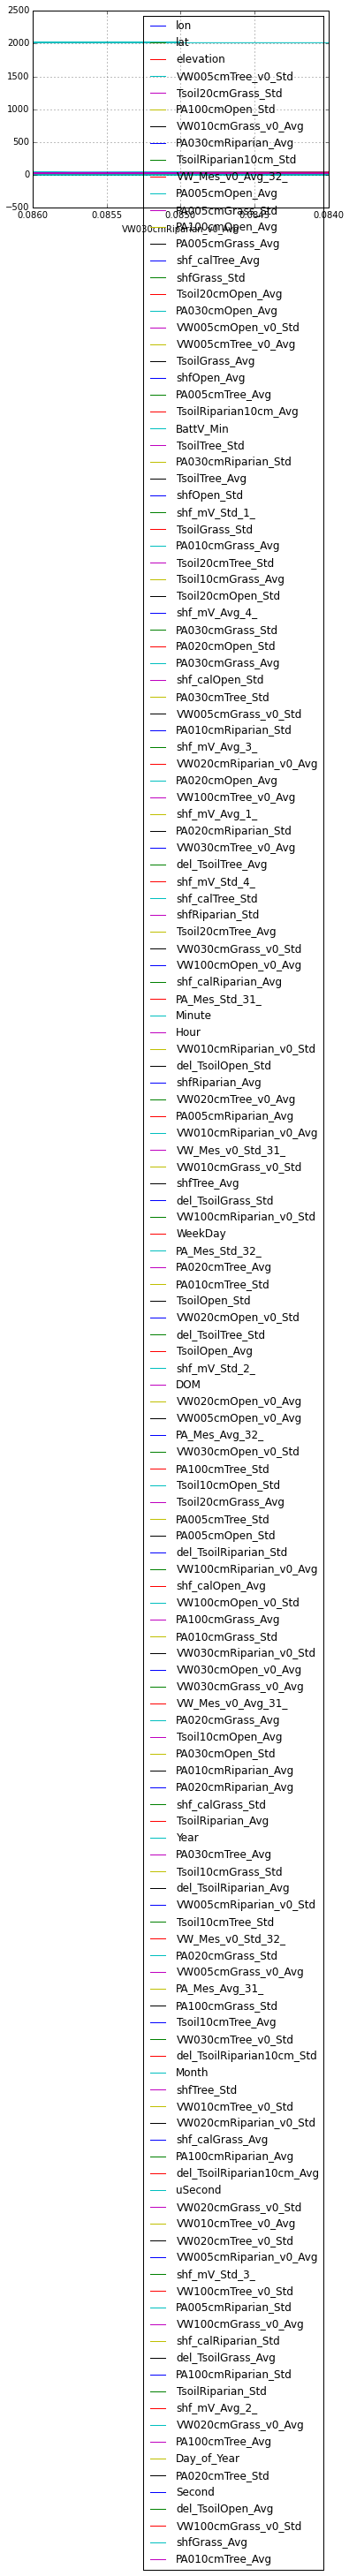

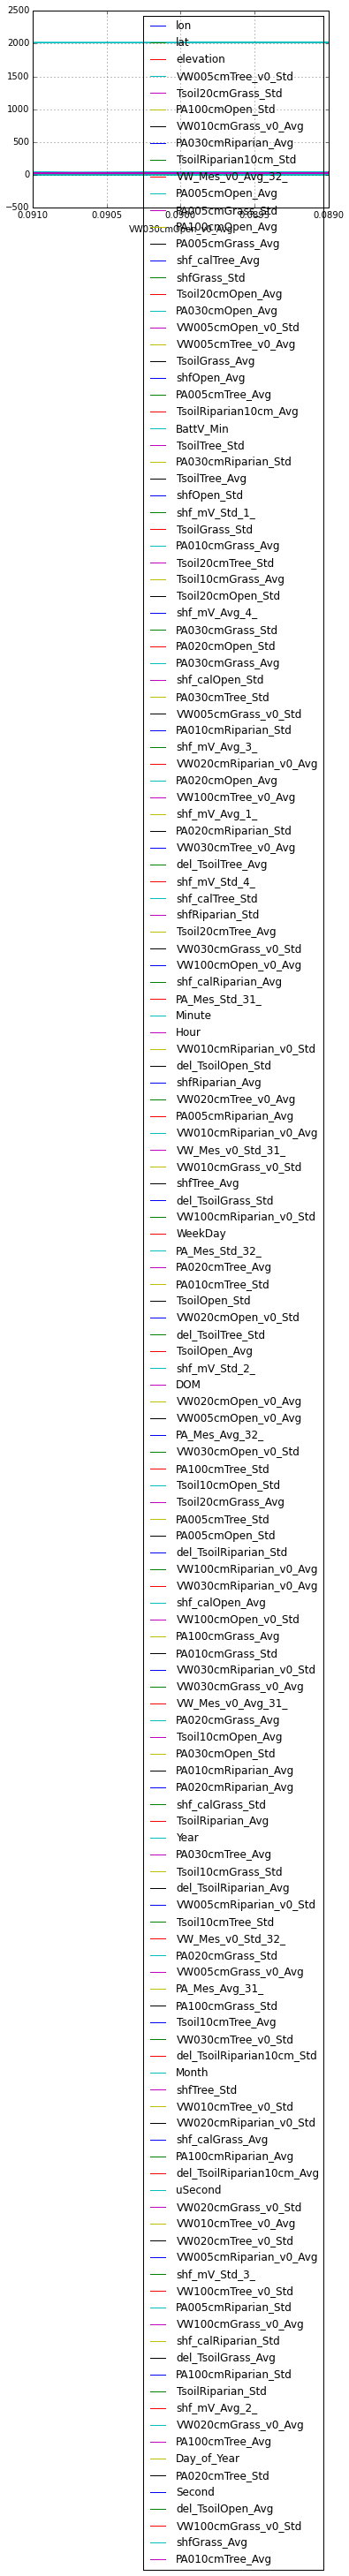

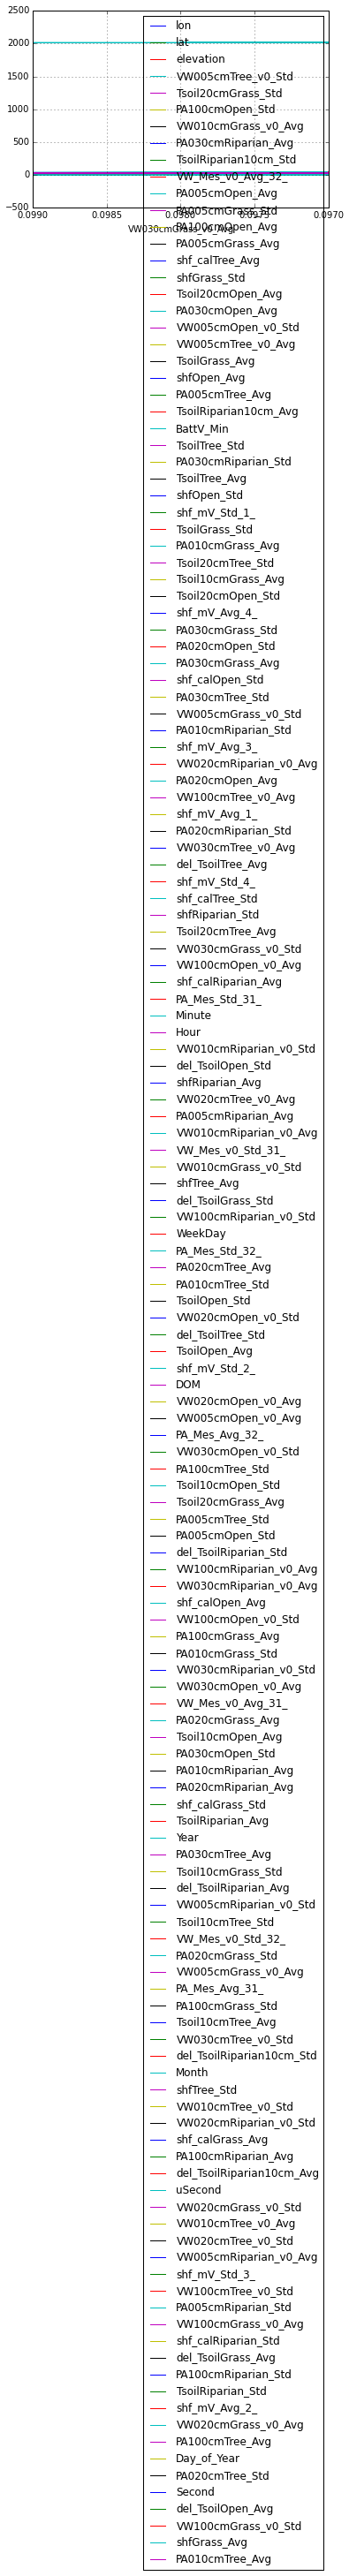

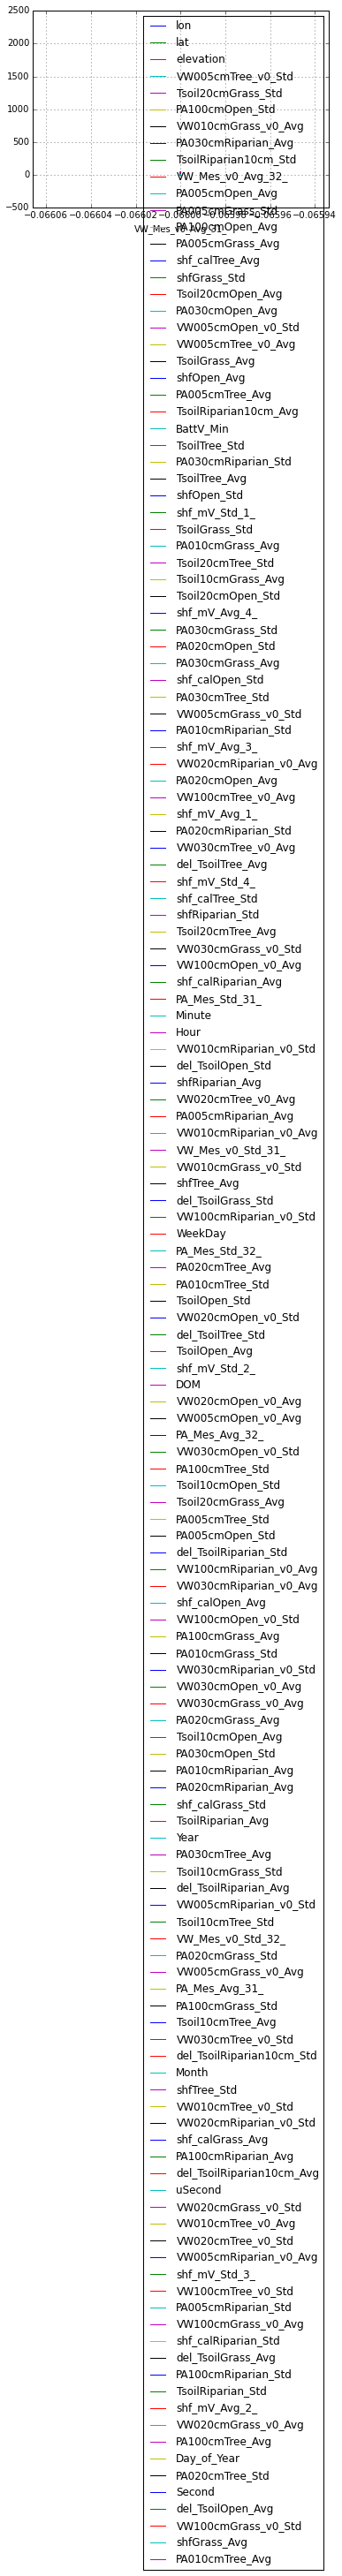

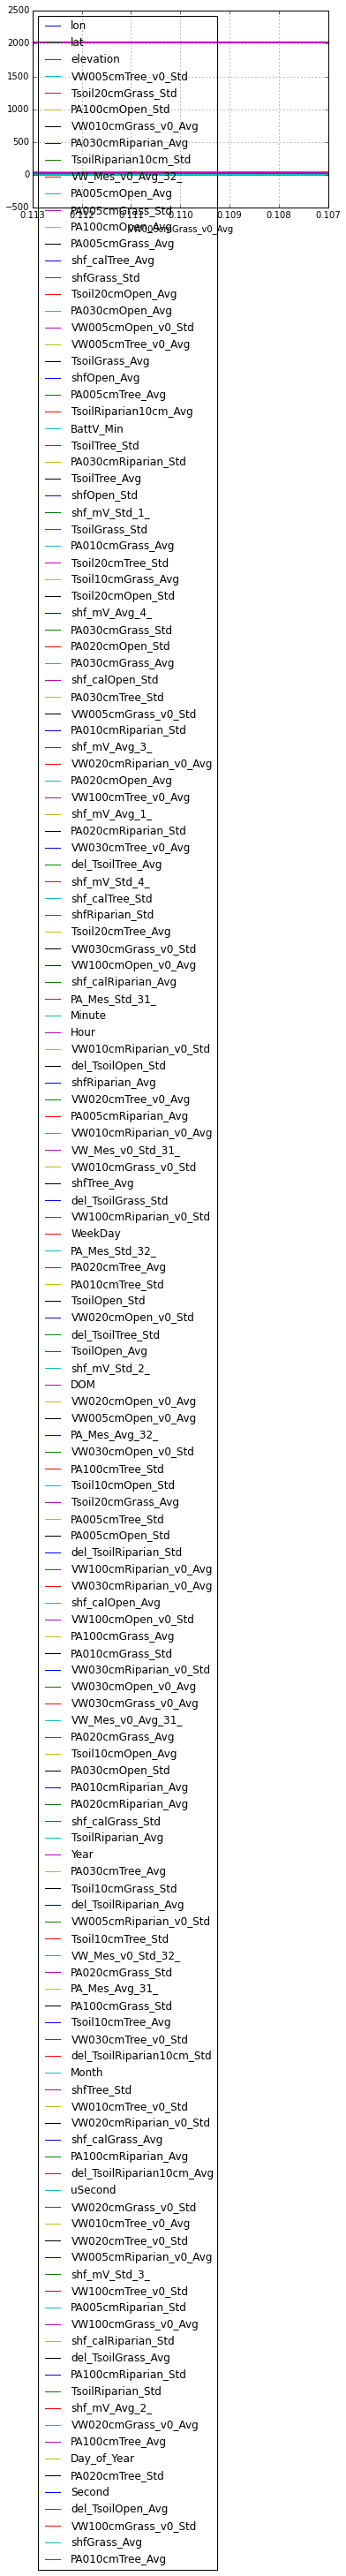

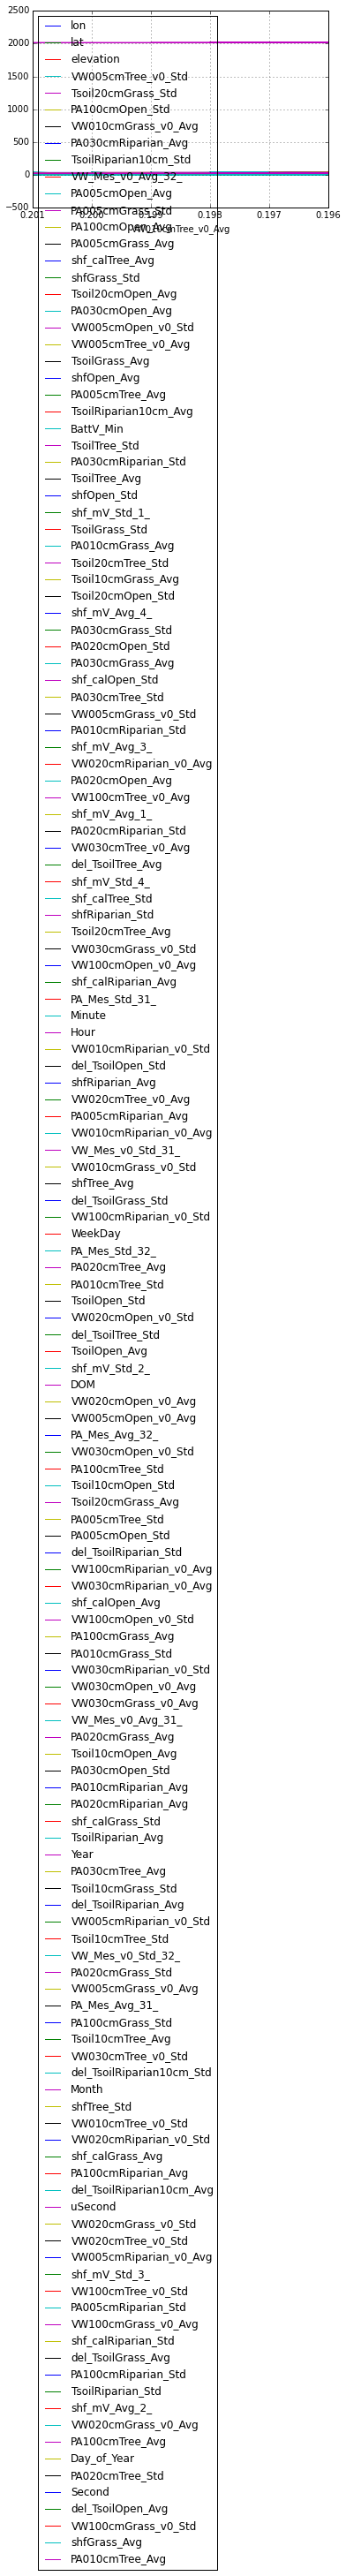

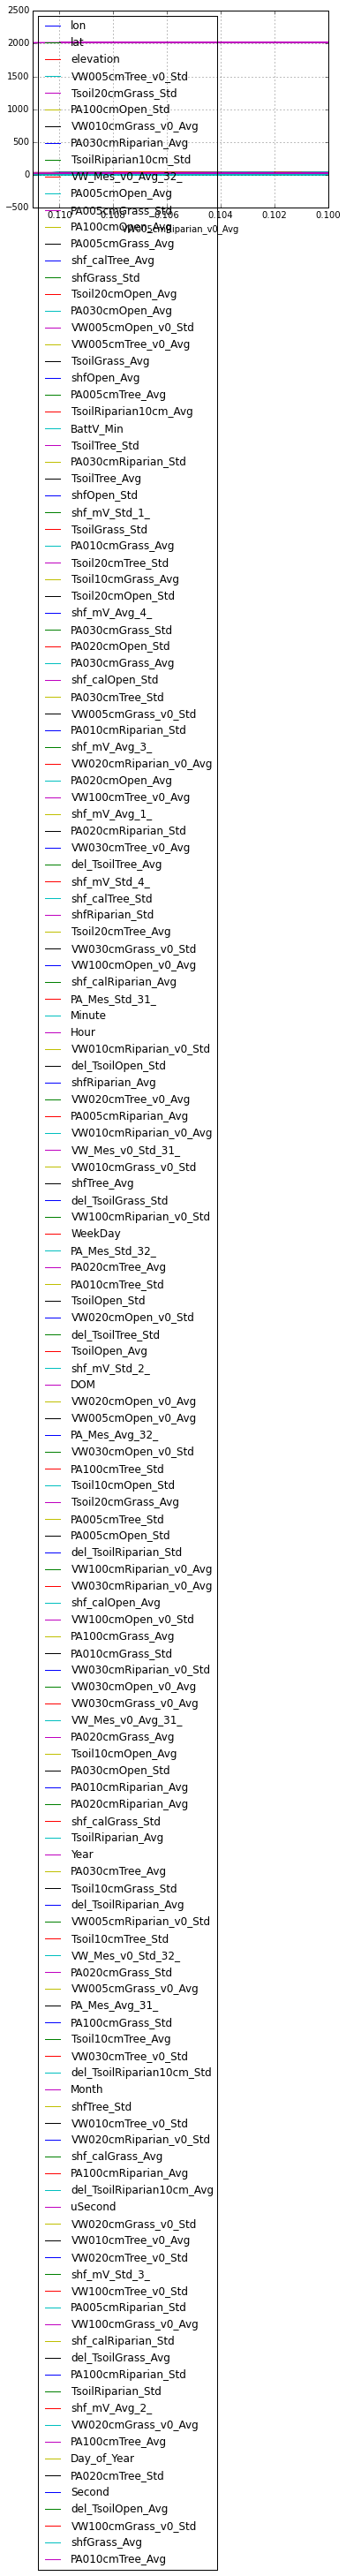

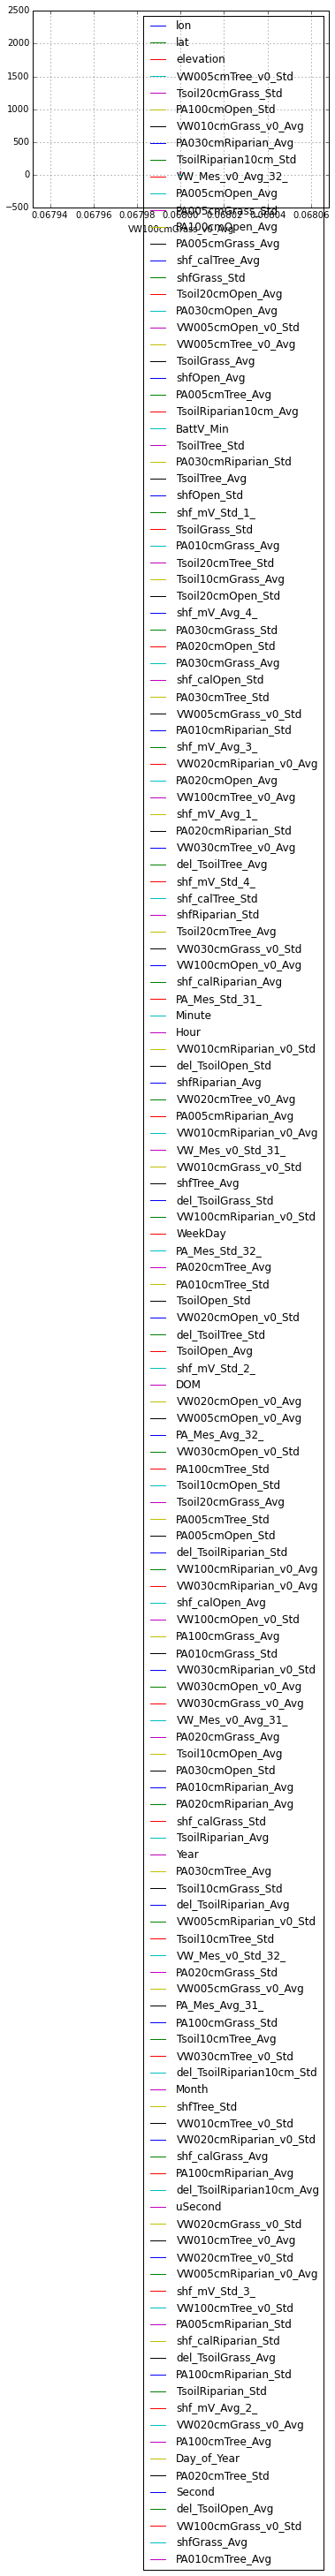

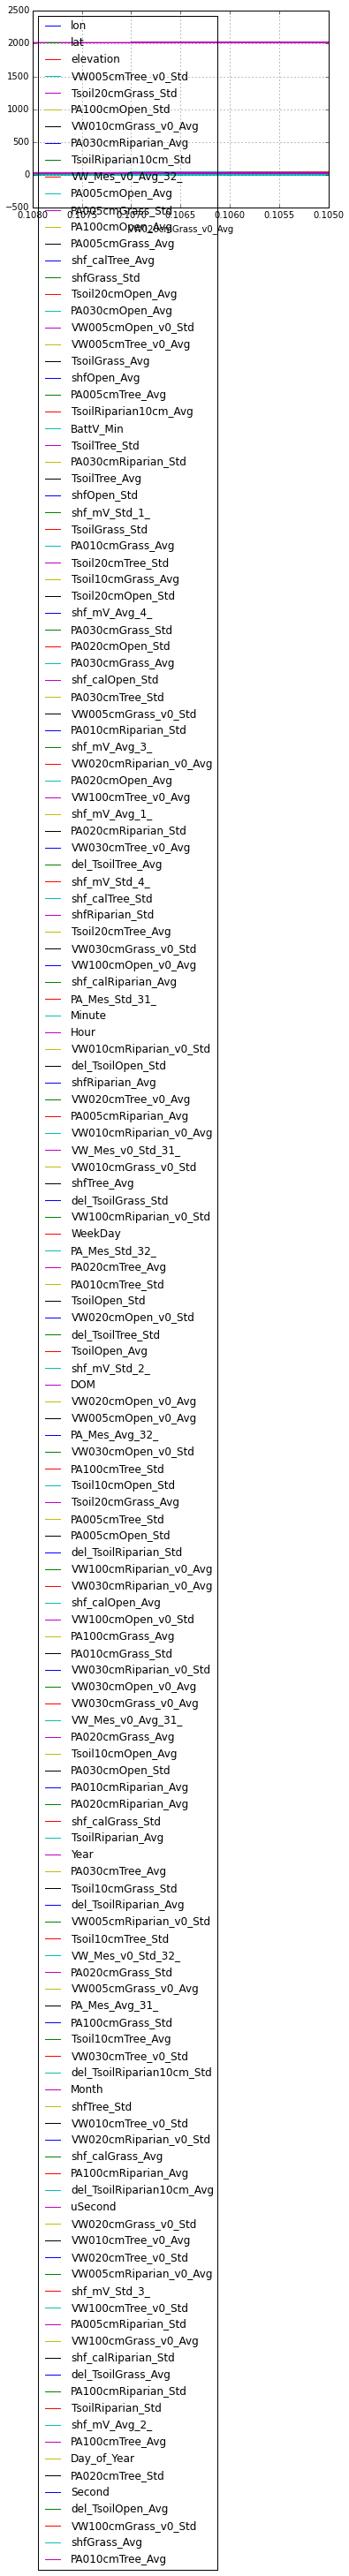

In [15]:
for col in list(df.columns):
    if 'VW' in col and 'Avg' in col:
        print(col)
        df.plot([col])

In [16]:
ds.coords['time']

<xray.DataArray 'time' (time: 1440)>
array(['2014-01-01T00:00:00.000000000+0300',
       '2014-01-01T00:10:00.000000000+0300',
       '2014-01-01T00:20:00.000000000+0300', ...,
       '2014-01-10T23:30:00.000000000+0300',
       '2014-01-10T23:40:00.000000000+0300',
       '2014-01-10T23:50:00.000000000+0300'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-12-31T21:00:00 2013-12-31T21:10:00 ...
Attributes:
    standard_name: time